### Name: Sohan Rudra
### Roll No: 16MA20054

In [13]:
#library imports
import math
from collections import namedtuple
import numpy as np
from sympy import symbols
import matplotlib.pyplot as plt

In [14]:
#some boilerplate code
x = symbols('x')
Equation = namedtuple('Equation',('a','b','c'))
Conditions = namedtuple('Conditions',('x0','xn','h'))
Boundary = namedtuple('Boundary', ('alpha', 'beta', 'gamma'))

In [43]:
def Finite_Diff_Solver(eq, bc0, bcn, cond, verbose=True):
    n = int(np.ceil((cond.xn - cond.x0)/cond.h))
    print(n)
    a, b, c, d = np.zeros((n)), np.zeros((n+1)), np.zeros((n)), np.zeros((n+1))
    #A
    b[0] = -2.0 / cond.h**2 + eq.b.subs(x, cond.x0) +\
    (1.0 / cond.h**2 - eq.a.subs(x, cond.x0) / (2.0 * cond.h)) * 2.0 * cond.h * bc0.alpha /\
    bc0.beta
    c[0] = 2.0 / cond.h**2 

    a[n-1] = 2.0 / cond.h**2 
    b[n] = -2.0 / cond.h**2 + eq.b.subs(x, cond.xn) -\
    (1.0 / cond.h**2 + eq.a.subs(x, cond.xn) / (2.0 * cond.h)) * 2.0 * cond.h * bcn.alpha /\
    bcn.beta
    
    #d
    d[0] = eq.c.subs(x, cond.x0) +\
    (1.0 / cond.h**2 - eq.a.subs(x, cond.x0) / (2.0 * cond.h)) * 2.0 * cond.h * bc0.gamma /\
    bc0.beta
    d[n] = eq.c.subs(x, cond.xn) -\
    (1.0 / cond.h**2 + eq.a.subs(x, cond.xn) / (2.0 * cond.h)) * 2.0 * cond.h * bcn.gamma /\
    bcn.beta
    for i, xi in enumerate(np.arange(cond.x0 + cond.h, cond.xn, cond.h),\
                           start=1):
        a[i-1] = 1.0 / cond.h**2 - eq.a.subs(x,xi) / (2.0*cond.h)
        b[i] = -2.0 / cond.h**2 + eq.b.subs(x, xi)
        c[i] = 1.0 / cond.h**2 + eq.a.subs(x,xi) / (2.0*cond.h)
        d[i] = eq.c.subs(x, xi)
    
    def tridiag(a, b, c, k1=-1, k2=0, k3=1):
        return np.diag(a, k1) + np.diag(b, k2) + np.diag(c, k3)
    if verbose:
        print("A={}".format(tridiag(a,b,c)))
        print("d={}".format(d.T))
    return (a,b,c,d)

In [48]:
def Thomas_Algorithm(coeff, bc0, bcn, cond):
    a, b, c, d = coeff
    n = int(np.ceil((cond.xn - cond.x0)/cond.h))
    c1 = np.zeros((n))
    d1 = np.zeros((n+1))
    c1[0] = c[0]/b[0]
    d1[0] = d[0]/b[0]
    for i in range(1,n):
        c1[i] = c[i]/(b[i]-a[i-1]*c1[i-1])
        d1[i] = (d[i] - a[i-1] * d1[i-1])/(b[i]-a[i-1]*c1[i-1])
    d1[n] = (d[n] - a[n-1] * d1[n-1])/(b[n] - a[n-1]*c1[n-1])
    def backsubstitution(c,d):
        y = np.zeros_like(d)
        y[-1] = d[-1]
        cache = y[-1]
        for i in reversed(range(d.shape[0]-1)):
            y[i] = d[i] - cache * c[i]
            cache = y[i]
        return y
    fin_y = backsubstitution(c1,d1)
    return fin_y
    

In [34]:
%%latex
\begin{align}
y'' -2xy' -2y = -4x\\
x \in (0,1) \\
y(0) - y'(0) = 0\\
2y(1) - y'(1) = 1\\
\end{align}

<IPython.core.display.Latex object>

In [61]:
#Equations & Boundary Conditions
eqn = Equation(-2.0*x,-2.0 + x*0.0,-4.0*x)
cond = Conditions(0,1,0.001)
bc1 = Boundary(1,-1,0)
bc2 = Boundary(2,-1,1)
tuples_coeff = Finite_Diff_Solver(eqn, bc1, bc2, cond, verbose=False)
y2 = Thomas_Algorithm(tuples_coeff, bc1, bc2, cond)
x_range2 = np.arange(cond.x0, cond.xn+cond.h, cond.h)

1000


In [59]:
print(y2)

[0.9997962  1.00482018 1.00989415 1.01501812 1.02019212 1.02541617
 1.0306903  1.03601455 1.04138898 1.04681363 1.05228858 1.0578139
 1.06338965 1.06901594 1.07469285 1.08042049 1.08619896 1.09202839
 1.0979089  1.10384061 1.10982368 1.11585825 1.12194447 1.12808252
 1.13427255 1.14051476 1.14680934 1.15315646 1.15955636 1.16600922
 1.17251528 1.17907477 1.18568792 1.19235498 1.1990762  1.20585184
 1.21268219 1.21956751 1.2265081  1.23350426 1.24055628 1.2476645
 1.25482923 1.2620508  1.26932957 1.27666588 1.28406009 1.29151258
 1.29902373 1.30659393 1.31422358 1.32191309 1.32966287 1.33747337
 1.34534503 1.35327828 1.3612736  1.36933146 1.37745235 1.38563674
 1.39388516 1.40219811 1.41057613 1.41901975 1.42752952 1.43610601
 1.44474978 1.45346143 1.46224155 1.47109075 1.48000966 1.4889989
 1.49805914 1.50719102 1.51639523 1.52567244 1.53502337 1.54444872
 1.55394923 1.56352564 1.5731787  1.58290918 1.59271788 1.60260559
 1.61257314 1.62262134 1.63275105 1.64296314 1.65325847 1.6636379

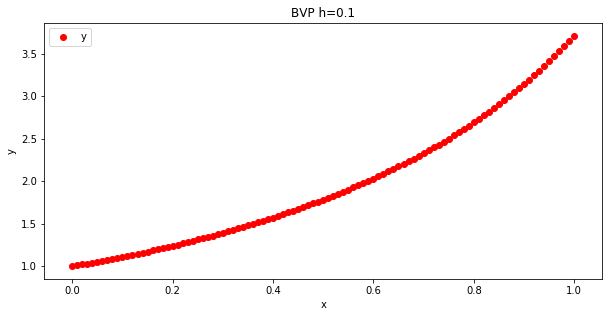

In [57]:
t1 = np.arange(cond.x0, cond.xn, 0.001)

#print(x_range)
fig = plt.figure(figsize=(10, 16))
ax = fig.add_subplot(311)
ax.set(title="BVP h=0.1", xlabel="x", ylabel="y")
ax.scatter(x_range2, y2, color='red')
ax.legend(('y','y_0.1'))
ax.plot()
fig.show()